In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def K_means(tensor, file_name = None):
    # 设置聚类数K
    K = 10

    dim = tensor.shape[0]
    print(tensor.shape)
    # print(dim)
    # 将每个通道的25x25特征图展平成一维向量，然后将所有通道的数据合并在一起
    flattened_tensor = tensor.reshape(dim, -1).T

    # 使用KMeans进行聚类
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(flattened_tensor)

    # 获取聚类结果
    cluster_labels = kmeans.labels_

    # 将聚类结果重新转换为25x25的特征图形状
    clustered_feature_maps = cluster_labels.reshape(25, 25)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis('off')  # 去掉坐标轴
    cax = ax.imshow(clustered_feature_maps, cmap='viridis')
    fig.colorbar(cax)

    # 保存图像，去掉空白边缘，并指定裁剪的边界
    if file_name is not None:
        # 这里的参数可以调整，左、下、右、上的裁剪比例，0 表示不裁剪，1 表示完全裁剪
        # bbox = [0.1, 0.1, 0.9, 0.9]  # 例如，裁剪10%的边缘
        extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
        fig.savefig(file_name, bbox_inches=extent.expanded(1.0, 0.806), pad_inches=0)

    # 显示图像
    plt.show()

# if __name__ == '__main__':
#     # 假设输入的tensor是一个NumPy数组，形状为(64, 25, 25)
#     tensor = np.random.rand(64, 25, 25)
#     K_means(tensor)


(256, 25, 25)


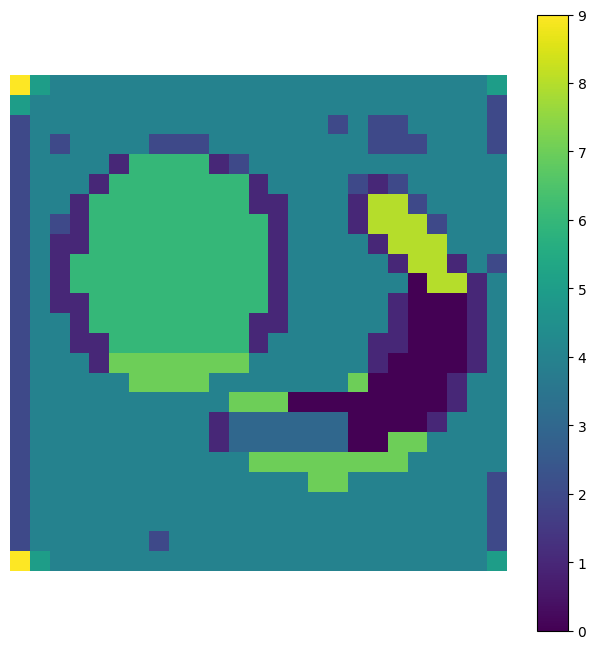

(64, 25, 25)


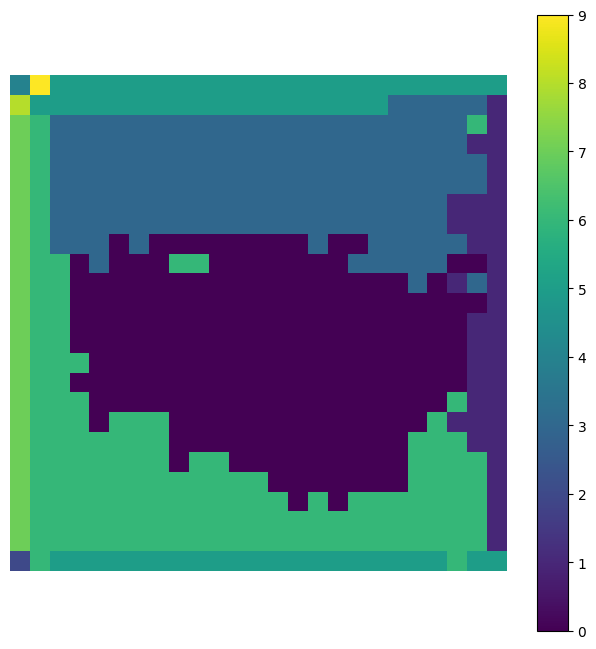

(64, 25, 25)


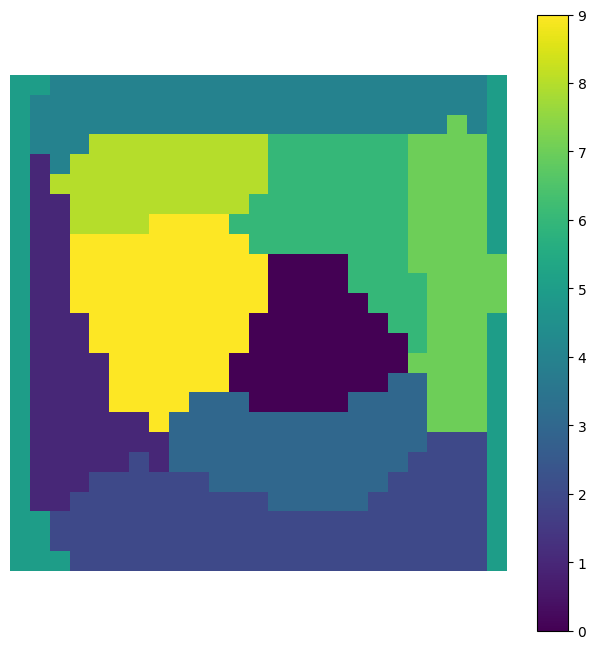

(64, 25, 25)


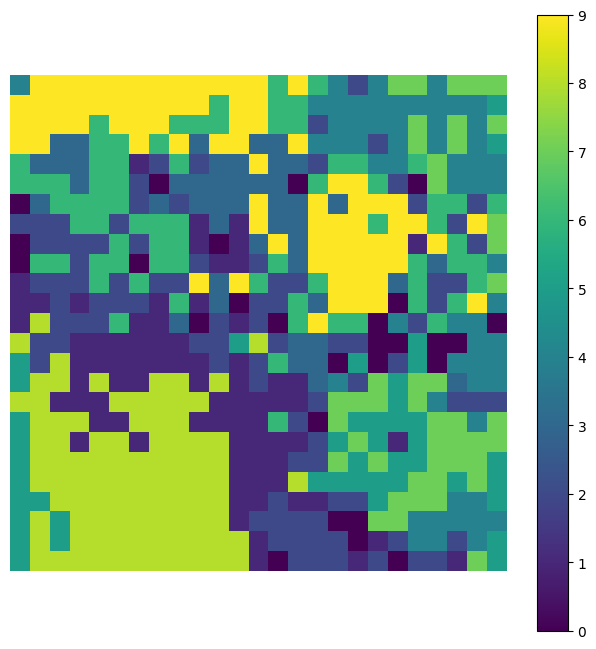

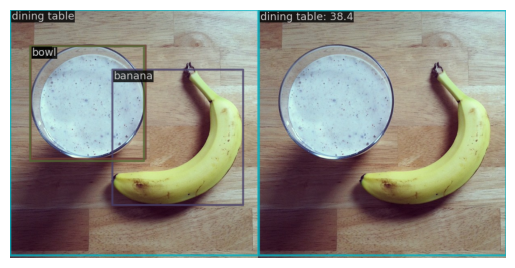

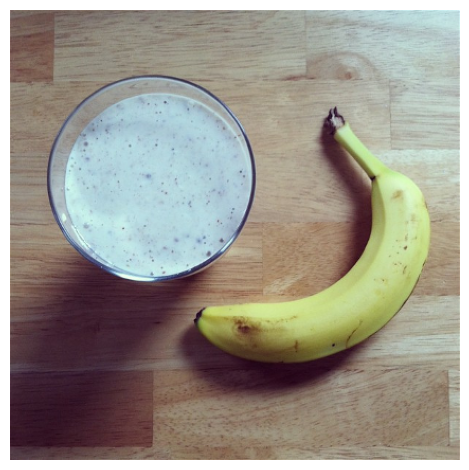

In [2]:
id_list = ['003434']
# id_list = ['039509']
# id_list = ['072605']
# id_list = ['072170']
id_list = ['034126']
# id_list = ['036731']
id_list = ['006801']
id_list = ['042473']
id_list = ['004436']

f_dir = '/home/bingxing2/ailab/scx7kzd/denghan/FMRIDet/code/feature'
f_dir_2 = '/home/bingxing2/ailab/scx7kzd/denghan/FMRIDet/code/feature_no_distill'

d_dir = '/home/bingxing2/ailab/scx7kzd/work_dirs/dab_detr_distill_64c_300q_l2_multi_d1_atlas2_f0.001_t256_k5_2_old/test_s1_30p/my_test'
d_dir_2 = '/home/bingxing2/ailab/group/ai4bio/public/nsd_processed_data/all_images/'

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


for id in id_list:
    file_name = os.path.join(f_dir, f'{id}_t1.npy')
    fea = np.load(file_name)
    K_means(fea, './test_0.png')

    # file_name = os.path.join(f_dir, f'{id}_t2.npy')
    # fea = np.load(file_name)
    # K_means(fea)

    file_name = os.path.join(f_dir, f'{id}_s0.npy')
    fea = np.load(file_name)
    K_means(fea, './test_1.png')

    file_name = os.path.join(f_dir, f'{id}_s1.npy')
    fea = np.load(file_name)
    K_means(fea, './test_2.png')
    # file_name = os.path.join(f_dir, f'{id}_s2.npy')
    # fea = np.load(file_name)
    # K_means(fea)
    file_name = os.path.join(f_dir_2, f'{id}_s2.npy')
    fea = np.load(file_name)
    K_means(fea, './test_3.png')

    img_path = os.path.join(d_dir, f'{id}.png')

    image = Image.open(img_path)
    plt.imshow(image)
    plt.axis('off')  # 关闭坐标轴显示
    plt.show()

    img_path = os.path.join(d_dir_2, f'{id}.png')

    image = Image.open(img_path)
    plt.imshow(image)
    plt.axis('off')  # 关闭坐标轴显示
    plt.tight_layout()  # 调整布局以去除白色边框
    plt.show()

    image.save('./test.png')